In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as ra
import matplotlib.pyplot as plt

In [32]:
# Brownian Motion via Increments

def BrownianMotion(stepsize=0.01, time=1):
    return np.concatenate(([0], np.cumsum(ra.normal(scale=np.sqrt(stepsize), size=int(time/stepsize)))))

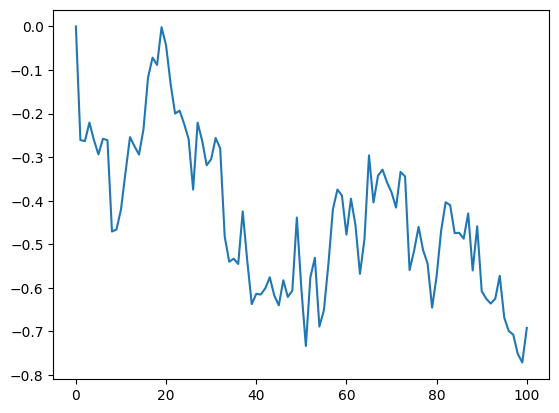

In [31]:
plt.plot(BrownianMotion())
plt.show()

In [33]:
# Poisson Process via Increments

def PoissonProcess(stepsize=0.01, time=10):
    return np.concatenate(([0], np.cumsum(ra.poisson(lam=stepsize, size=int(time/stepsize)))))

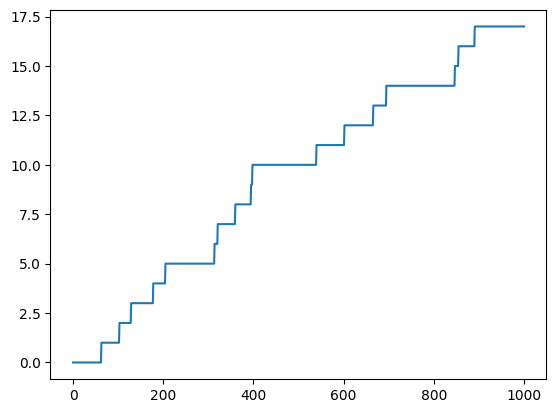

In [35]:
plt.plot(PoissonProcess())
plt.show()

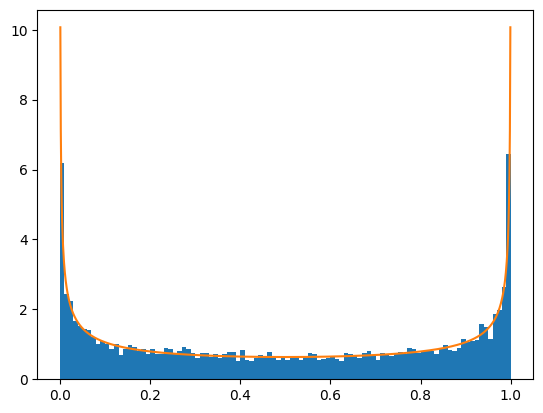

In [50]:
# Arcsine Law for Brownian Motion

samples = []

for _ in range(10000):
    b = BrownianMotion(0.001, 1)
    p = [x for x in b if x > 0]
    samples.append(len(p)/1000)

plt.hist(samples, bins=100, density=True)
plt.plot([x/1000 for x in range(1,1000)], [1 / (np.pi * np.sqrt(x/1000 *(1-x/1000))) for x in range(1,1000)])
plt.show()

In [55]:
# Ornstein-Uhlenbeck Process (remove the last factor to get stationarity)

N = 1000
epsilon = 1/N
C = np.zeros(shape=(N,N))

for i in range(N):
    for j in range(N):
        s = epsilon * (min(i,j)+1)
        t = epsilon * (max(i,j)+1)
        C[i,j] = 0.5 * np.exp(-2 * (t-s)) * (1 - np.exp(-2 * s))

A = la.cholesky(C)

def OrnsteinUhlenbeck():
    return A @ ra.normal(size=N)

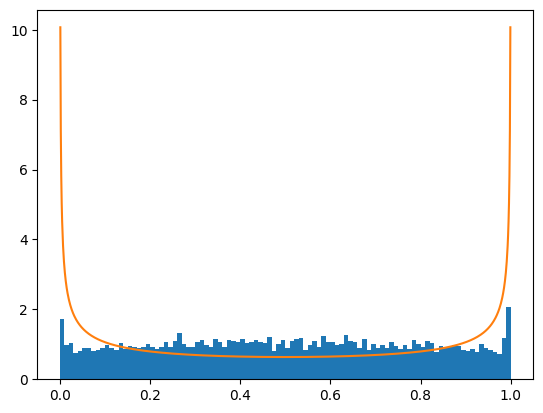

In [56]:
# Arcsine law for Ornstein-Uhlenbeck?

samples = []

for _ in range(10000):
    b = OrnsteinUhlenbeck()
    p = [x for x in b if x > 0]
    samples.append(len(p)/N)

plt.hist(samples, bins=100, density=True)
plt.plot([x/N for x in range(1,N)], [1 / (np.pi * np.sqrt(x/N *(1-x/N))) for x in range(1,N)])
plt.show()

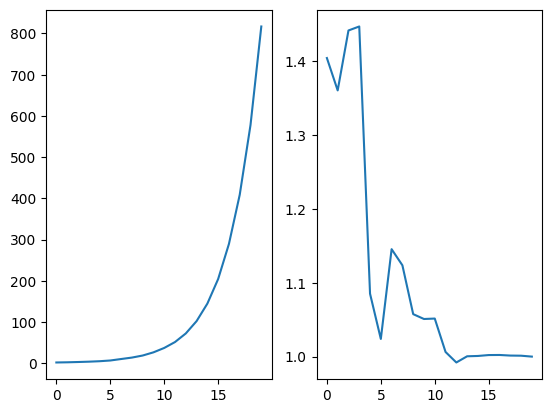

In [58]:
# Brownian Variations

N = 20
B = BrownianMotion(2 ** -N)

variations = []
quadraticvariations = []

for n in range(1,N+1):
    vsum = 0
    qvsum = 0

    for j in range(2 ** n):
        diff = B[(j+1) * 2**(N-n)] - B[j * 2**(N-n)]
        vsum += np.abs(diff)
        qvsum += diff**2

    variations.append(vsum)
    quadraticvariations.append(qvsum)

plt.subplot(1, 2, 1)
plt.plot(variations)

plt.subplot(1, 2, 2)
plt.plot(quadraticvariations)

plt.show()

In [70]:
# Levy Construction

def Lambda(t):
    if t < 0 or t > 1:
        return 0
    if t <= 1/2:
        return t
    if t >= 1/2:
        return 1-t

def LevyBrownianMotion(N, stepsize=0.001, time=1):
    Z = ra.normal(size=N+1)
    B = [0.0]
    t = 0

    while t < time:
        t += stepsize

        s = t * Z[0]
        for n in range(1,N+1):
            j = np.floor(np.log2(n))
            k = n % 2**j
            s += 2**(j/2) * Lambda(2**j * t - k) * Z[n]

        B.append(s)

    return B

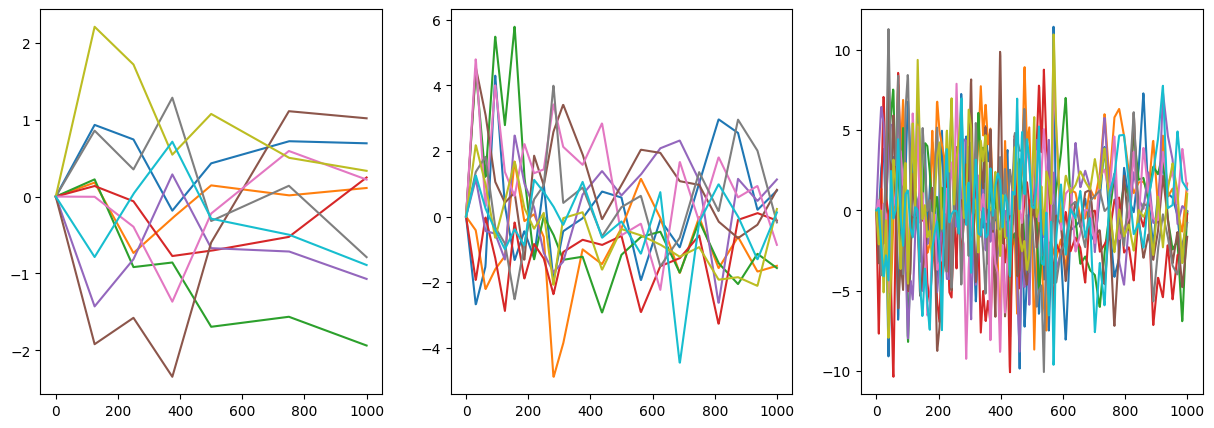

In [72]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
for _ in range(10):
    plt.plot(LevyBrownianMotion(5))

plt.subplot(1,3,2)
for _ in range(10):
    plt.plot(LevyBrownianMotion(20))

plt.subplot(1,3,3)
for _ in range(10):
    plt.plot(LevyBrownianMotion(100))

plt.show()